In [ ]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "zahidhussain909",
    "key": "39a06efd89d0f2a699143b8d3d62b216"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.80G/1.81G [00:30<00:00, 54.8MB/s]
100% 1.81G/1.81G [00:31<00:00, 62.6MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/100-bird-species.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
num_class = len(os.listdir("/content/birds/train/"))
num_class

275

In [ ]:
train_dir="/content/birds/train/"
test_dir="/content/birds/test/"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(180, 180), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(180, 180),
                                               class_mode="categorical",
                                               seed=42)


Found 39364 images belonging to 275 classes.
Found 1375 images belonging to 275 classes.


In [ ]:
model1=tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(180,180,3)),
                                   tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                                   tf.keras.layers.Conv2D(10,3,activation='relu'),
                                   tf.keras.layers.MaxPool2D(),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(275,activation='softmax')
])

model1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history1=model1.fit(train_data,epochs=5,steps_per_epoch=int(len(train_data)),validation_data=test_data,validation_steps=int(len(test_data)))

Epoch 1/5
1231/1231 [==============================] - 118s 72ms/step - loss: 4.2110 - accuracy: 0.1888 - val_loss: 2.8251 - val_accuracy: 0.4022
Epoch 2/5
1231/1231 [==============================] - 89s 72ms/step - loss: 1.7535 - accuracy: 0.6181 - val_loss: 2.5335 - val_accuracy: 0.4836
Epoch 3/5
1231/1231 [==============================] - 88s 72ms/step - loss: 0.2975 - accuracy: 0.9361 - val_loss: 3.3754 - val_accuracy: 0.3978
Epoch 4/5
1231/1231 [==============================] - 89s 72ms/step - loss: 0.0359 - accuracy: 0.9940 - val_loss: 3.8048 - val_accuracy: 0.4276
Epoch 5/5
1231/1231 [==============================] - 89s 72ms/step - loss: 0.0155 - accuracy: 0.9979 - val_loss: 4.3083 - val_accuracy: 0.4065


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rain_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,target_size=(180,180),
                                               batch_size=32,class_mode='categorical')

Found 39364 images belonging to 275 classes.


In [ ]:
model1=tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(180,180,3)),
                                   tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                                   tf.keras.layers.Conv2D(10,3,activation='relu'),
                                   tf.keras.layers.MaxPool2D(),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(275,activation='softmax')
])

model1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history1=model1.fit(train_data_augmented,epochs=5,steps_per_epoch=int(len(train_data_augmented)),validation_data=test_data,validation_steps=int(len(test_data)))

Epoch 1/5
1231/1231 [==============================] - 360s 292ms/step - loss: 5.0422 - accuracy: 0.0538 - val_loss: 3.9626 - val_accuracy: 0.1855
Epoch 2/5
1231/1231 [==============================] - 359s 291ms/step - loss: 4.3420 - accuracy: 0.1269 - val_loss: 3.4630 - val_accuracy: 0.2720
Epoch 3/5
1231/1231 [==============================] - 353s 286ms/step - loss: 4.1169 - accuracy: 0.1574 - val_loss: 3.2157 - val_accuracy: 0.3127
Epoch 4/5
1231/1231 [==============================] - 352s 286ms/step - loss: 3.9546 - accuracy: 0.1834 - val_loss: 3.1054 - val_accuracy: 0.3295
Epoch 5/5
 712/1231 [================>.............] - ETA: 2:28 - loss: 3.8225 - accuracy: 0.2052

KeyboardInterrupt: ignored

In [ ]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
import tensorflow as tf

base_model=tf.keras.applications.InceptionV3(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=(180,180,3))
x=base_model(inputs)
x=layers.GlobalAveragePooling2D()(x)
outputs=layers.Dense(275,activation='softmax')(x)

model2=tf.keras.Model(inputs,outputs)


model2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history2=model2.fit(train_data,epochs=5,validation_data=test_data,validation_steps=int(len(test_data)))

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/5
1231/1231 [==============================] - 167s 131ms/step - loss: 1.6448 - accuracy: 0.6266 - val_loss: 0.5996 - val_accuracy: 0.8204
Epoch 2/5
1231/1231 [==============================] - 155s 126ms/step - loss: 0.7879 - accuracy: 0.7996 - val_loss: 0.4885 - val_accuracy: 0.8589
Epoch 3/5
1231/1231 [==============================] - 155s 126ms/step - loss: 0.5784 - accuracy: 0.8472 - val_loss: 0.4954 - val_accuracy: 0.8625
Epoch 4/5
1231/1231 [==============================] - 154s 125ms/step - loss: 0.4594 - accuracy: 0.8720 - val_loss: 0.4474 - val_accuracy: 0.8749
Epoch 5/5
1231/1231 [==============================] - 154s 125ms/step - loss: 0.3842 - accuracy: 0.8936 - val_loss: 0.5200 - val_accuracy: 0.8713


In [ ]:
!wget https://raw.githubusercontent.com/Zahid8/datasets_for_cnn/master/1.jpg

--2021-07-05 15:22:04--  https://raw.githubusercontent.com/Zahid8/datasets_for_cnn/master/1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22028 (22K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>]  21.51K  --.-KB/s    in 0s      

2021-07-05 15:22:04 (53.1 MB/s) - ‘1.jpg’ saved [22028/22028]



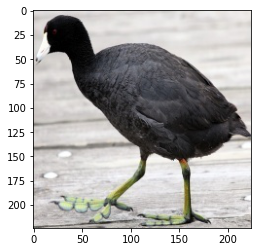

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

bird=mpimg.imread("1.jpg")
plt.imshow(bird)

In [ ]:
bird.shape

TensorShape([1, 224, 224, 3])

In [ ]:
def load_prep(filename,img_shape=180):

    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,size=[img_shape,img_shape])

    img=img/255.
    return img

In [ ]:
bird=load_prep("1.jpg")
bird

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.8454752 , 0.8454752 , 0.83763206],
        [0.8486725 , 0.8486725 , 0.8408294 ],
        [0.85107964, 0.85107964, 0.8432365 ],
        ...,
        [0.94145006, 0.92968535, 0.9100775 ],
        [0.94662315, 0.93485844, 0.9152506 ],
        [0.948061  , 0.9362963 , 0.91668844]],

       [[0.8631373 , 0.86169934, 0.8509804 ],
        [0.8645752 , 0.8631373 , 0.85347277],
        [0.86793756, 0.86649966, 0.8586565 ],
        ...,
        [0.9281482 , 0.9163835 , 0.89677566],
        [0.93542486, 0.92366016, 0.9040523 ],
        [0.93812495, 0.92636025, 0.9067524 ]],

       [[0.8636916 , 0.85977006, 0.8440838 ],
        [0.86635435, 0.8624328 , 0.84962237],
        [0.8697168 , 0.86579525, 0.8579521 ],
        ...,
        [0.91830075, 0.90653604, 0.8869282 ],
        [0.9255774 , 0.9138127 , 0.89420485],
        [0.92835397, 0.91658926, 0.8969814 ]],

       ...,

       [[0.84619933, 0.8501209 , 0.83051306],
        [0.80

In [ ]:
bird=tf.expand_dims(bird,axis=0)

In [ ]:
pred=model2.predict(bird)
pred

array([[1.36049274e-17, 1.81551020e-12, 2.27105931e-10, 7.29112430e-12,
        3.60804642e-16, 5.64832014e-10, 9.99933243e-01, 1.29393523e-12,
        7.27037297e-17, 4.17112110e-18, 3.86910578e-19, 2.35809365e-14,
        2.58346015e-14, 2.62591143e-10, 2.19579504e-20, 1.28320037e-11,
        4.43923683e-11, 3.54774514e-25, 3.88812422e-16, 6.18964922e-14,
        1.06257005e-14, 2.33674897e-15, 2.37387556e-13, 3.29121414e-13,
        1.53559916e-19, 1.03613750e-18, 3.37403144e-15, 9.15886426e-14,
        4.63481623e-14, 3.02134619e-13, 2.69343376e-21, 3.17577453e-12,
        5.12958254e-09, 3.15651220e-11, 3.25745168e-06, 2.56370354e-17,
        3.73196753e-13, 1.38165679e-09, 2.45081182e-19, 1.77336179e-09,
        3.81277956e-14, 2.74772851e-15, 3.05675819e-12, 4.18834334e-17,
        1.76669715e-17, 1.17545169e-17, 3.56396764e-18, 5.88560234e-14,
        1.85921151e-17, 1.18177831e-12, 2.72430384e-18, 3.88471116e-10,
        1.37534661e-09, 4.21007842e-18, 1.83428923e-15, 1.954616

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/birds/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names) calss-names[6]

['AFRICAN CROWNED CRANE' 'AFRICAN FIREFINCH' 'ALBATROSS'
 'ALEXANDRINE PARAKEET' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'ANHINGA' 'ANNAS HUMMINGBIRD' 'ANTBIRD'
 'ARARIPE MANAKIN' 'ASIAN CRESTED IBIS' 'BALD EAGLE' 'BALI STARLING'
 'BALTIMORE ORIOLE' 'BANANAQUIT' 'BANDED BROADBILL' 'BAR-TAILED GODWIT'
 'BARN OWL' 'BARN SWALLOW' 'BARRED PUFFBIRD' 'BAY-BREASTED WARBLER'
 'BEARDED BARBET' 'BEARDED REEDLING' 'BELTED KINGFISHER'
 'BIRD OF PARADISE' 'BLACK & YELLOW bROADBILL' 'BLACK FRANCOLIN'
 'BLACK SKIMMER' 'BLACK SWAN' 'BLACK TAIL CRAKE' 'BLACK THROATED BUSHTIT'
 'BLACK THROATED WARBLER' 'BLACK VULTURE' 'BLACK-CAPPED CHICKADEE'
 'BLACK-NECKED GREBE' 'BLACK-THROATED SPARROW' 'BLACKBURNIAM WARBLER'
 'BLUE GROUSE' 'BLUE HERON' 'BOBOLINK' 'BORNEAN BRISTLEHEAD'
 'BORNEAN LEAFBIRD' 'BROWN NOODY' 'BROWN THRASHER' 'BULWERS PHEASANT'
 'CACTUS WREN' 'CALIFORNIA CONDOR' 'CALIFORNIA GULL' 'CALIFORNIA QUAIL'
 '

'AFRICAN CROWNED CRANE'

In [ ]:
import numpy as np

result = pred.argmax()
class_names[result]

'AMERICAN COOT'